# Wrangle Open Street Map data
__Project Logbook__

In [1]:
%cd D:\Users\michael\Google Drive\DataAnalyst\Udacity\Project_2\data

D:\Users\michael\Google Drive\DataAnalyst\Udacity\Project_2\data


In [2]:
import audit_nodes as nodes
import audit_nodeTags as nodeTags
import audit_ways as ways
import audit_wayTags as wayTags
from quick_parse_osm import count_tags

Overpass query used to extract Open Street Map raw data in XML

```sh
overpass query
(
   node(53.6782,9.6072,53.7988,9.7888);
   <;
);
out meta;
```

In [3]:
# Save coordinates of bounding box
minlongitude = 9.6072
maxlongitude = 9.7888
minlatitude = 53.6782
maxlatitude = 53.7988

<img src="images/InvestigatedArea.png" width = "600" height="474" alt="OSM Area: Germany, Schleswig-Hostein, Pinneberg, Elmshorn & Uetersen" />

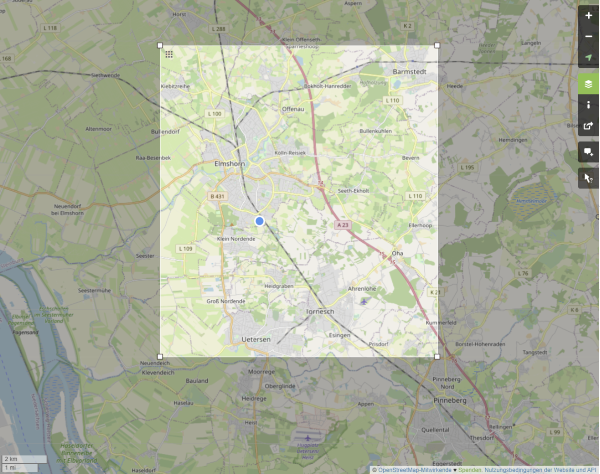

Issue with reduced data files
```
  <node changeset="73875873" id="249711938" lat="53.7043716" lon="9.7212653" timestamp="2019-08-29T10:42:18Z" uid="66904" user="OSchlüter" version="2" /><node changeset="51229458" id="249718764" lat="53.6813232" lon="9.6561567" timestamp="2017-08-18T10:57:22Z" uid="1854009" user="richard23" version="3" />
```

```
  <node changeset="73875873" id="249711938" lat="53.7043716" lon="9.7212653" timestamp="2019-08-29T10:42:18Z" uid="66904" user="OSchlüter" version="2" />
  <node changeset="51229458" id="249718764" lat="53.6813232" lon="9.6561567" timestamp="2017-08-18T10:57:22Z" uid="1854009" user="richard23" version="3" />
```

Solved by applying regex to data files using replacement function in notepad++ 

*search string:*   ```/>(<node.*)```   
*replace string:*  ```/>\n  \1```

In [4]:
# osm data files
#osm_file = '../data/GE_SH_PI_elmshorn_uetersen_k=20.osm'
#osm_file = '../data/GE_SH_PI_elmshorn_uetersen_k=100.osm'
osm_file = 'GE_SH_PI_elmshorn_uetersen.osm'

## General overview of dataset

In [5]:
print(count_tags(osm_file))

{'osm': 1, 'note': 1, 'meta': 1, 'node': 252825, 'tag': 226348, 'way': 51297, 'nd': 346424, 'relation': 614, 'member': 39735}


### Assessing nodes


#### Assessing node id field 
What are we going to do?
+ cout nodes  
+ check for data type
+ all node ids positive?
+ check for range

In [6]:
nodes.audit_node_id(osm_file, output=True);

Number of nodes:  252825
Number of false node id type:  0
Max node id:  7869305206
Min node id:  131499


### Assessing coordinates
What are we going to do?
+ check for data type float
+ coords in range of osm API request


In [7]:
nodes.audit_coords(osm_file, minlon=minlongitude, maxlon=maxlongitude, minlat=minlatitude, maxlat=maxlatitude, output=True);

Number of false coord types:  0
Number of nodes outside bounding box:  0


### Assessing users
What are we going to do with the user name and uid?
+ check uid for data type int
+ check uid for range (min, max)
+ number of unique uids
+ uid, name always consistent?
+ check user name for critical characters

In [8]:
nodes.audit_users(osm_file, output=True);

Number of wrong uid type:  0
Max user id:  11558570
Min_user id:  697
Number of unique users:  468
Number of inconsistent uid/ name combinations:  0
Number of problematic user names:  2
List of problematic user names:  {(6526984, '@mmanuel'), (1041363, 'nit@bse')}


### Assessing version and changeset
What are we going to do?
+ check version and changeset for data type int
+ check version and changeset for range (min, max)
+ number of unique changesets

In [9]:
nodes.audit_version_chset(osm_file, output=True);

Number of falsy types:  0
Max version:  40
Min version:  1
Max changeset id:  90318548
Min changeset id:  23959
Number of unique changesets:  5236


### Assessing timestamp
What are we going to do?
+ check timestamp for data type datetime
+ check for range (min, max)

In [10]:
nodes.audit_timestamp(osm_file, output=True);

Number of wrong date types:  0
Earliest date:  2007-09-10 08:58:41+00:00
Latest date:  2020-09-02 18:21:42+00:00


---

## Audit node tags

What we will check:
+ how many different types of keys do we have?
+ Are they all lower case?
+ How may colon keys do we have?
+ Do we have keys, values with problematoc characters?
+ Do we have 'regular' keys wich are also types?
+ Do we find 'regular' keys within the keys of other types?

### Audit keys

In [11]:
_, __, keys = nodeTags.audit_keys(osm_file, output=True, out_depth=10);

Number of problematic keys:  0
Number of keys not only lower case:  39
List of keys not only lower case (first 10):
	 openGeoDB:type
	 openGeoDB:is_in
	 communication:gsm-r
	 TMC:cid_58:tabcd_1:Class
	 communication:1800mhz
	 socket:type2:output
	 currency:EUR
	 TMC:cid_58:tabcd_1:PrevLocationCode
	 communication:800mhz
	 voltage-low
Number of unique node types:  74
List of types followed by number of keys per type plus 3 keys (first 10):
  Type: regular | keys: 207 | ['smoking', 'motorcar', 'clothes']
  Type: railway | keys: 68 | ['signal:expected_position', 'turnout_side', 'signal:wrong_road']
  Type: recycling | keys: 22 | ['electrical_appliances', 'clothes', 'cartons']
  Type: openGeoDB | keys: 16 | ['name', 'loc_id', 'sort_name']
  Type: socket | keys: 14 | ['chademo:current', 'type2:output', 'type2:current']
  Type: removed | keys: 13 | ['payment:credit_cards', 'ref', 'operator']
  Type: payment | keys: 13 | ['girocard', 'telephone_cards', 'jcb']
  Type: note | keys: 12 | ['name'

In [12]:
keys['TMC']

{'cid_58:tabcd_1:Class',
 'cid_58:tabcd_1:Direction',
 'cid_58:tabcd_1:LCLversion',
 'cid_58:tabcd_1:LocationCode',
 'cid_58:tabcd_1:NextLocationCode',
 'cid_58:tabcd_1:PrevLocationCode'}

In [13]:
nodeTags.unique_keys(keys)

503

In [14]:
nodeTags.keys_double(keys, output=True);

Type equals "regular" key  26 times.
All types that equal a "regular" key: ['railway', 'source', 'crossing', 'name', 'ref', 'brand', 'wheelchair', 'traffic_signals', 'amenity', 'note', 'capacity', 'internet_access', 'traffic_sign', 'shelter', 'species', 'genus', 'building', 'voltage', 'social_facility', 'location', 'healthcare', 'fixme', 'memorial', 'parking', 'operator', 'surveillance']


In [15]:
nodeTags.check4reg_keys(keys, output=True, out_depth=10);

Number of 'regular' keys found in other types:  44
Matched keys (first 10): 
- clothes - found in:  {'recycling:clothes'}
- source - found in:  {'name:source', 'generator:source'}
- vending - found in:  {'note:vending'}
- collection_times - found in:  {'note:collection_times', 'removed:collection_times'}
- wikipedia - found in:  {'brand:wikipedia', 'related:wikipedia', 'subject:wikipedia'}
- wheelchair - found in:  {'toilets:wheelchair'}
- distance - found in:  {'seamark:distance_mark:distance'}
- couplings - found in:  {'fire_hydrant:couplings'}
- level - found in:  {'isced:level'}
- crossing - found in:  {'railway:signal:crossing:states', 'railway:signal:crossing', 'railway:signal:crossing:repeated', 'railway:signal:crossing:form'}


### Audit values 

In [16]:
pbl_values, missing_values = nodeTags.audit_values(osm_file, output=True, out_depth=100)

Missing values found for 0 nodes
Problematic characters found in 58 keys.
name: 255
website: 187
ref: 129
opening_hours: 127
phone: 98
email: 37
route_ref: 36
fax: 28
collection_times: 28
note: 20
description: 18
text: 16
vacant: 14
operator: 13
states: 11
is_in: 8
fixme: 7
exact: 7
source: 7
position: 6
image: 6
de: 5
level: 4
url: 4
voltage: 4
speed: 4
created_by: 3
brand: 3
flow_capacity: 3
LCLversion: 2
auto_update: 2
cuisine: 2
traffic_sign: 2
facebook: 2
inscription: 2
stripclub: 2
housenumber: 2
species: 2
street: 2
postal_code: 1
version: 1
lines: 1
vending: 1
ele: 1
bus_lines: 1
frequency: 1
maxheight: 1
end_date: 1
output: 1
speciality: 1
maxweight: 1
psv_type: 1
date: 1
start_date: 1
flow_rate: 1
memorial: 1
ssid: 1
height: 1


In [17]:
pbl_values['url']

{'http://geofox.hvv.de/jsf/stationSchedule.seam?inputStation=Achtern%20Hoff',
 'http://www.cafe-schlossgefaengnis.de/',
 'http://www.toepferspass.de',
 'http://www.zum-bootssteg.de'}

 Problematic 'name' values:
 'BÜ 27 "Wrangelpromenade"',
 'BÜ 28 "Gerlingweg"',
 'BÜ 29 "Grenzweg"',
 
    
     <node id="1239947780" lat="53.7679521" lon="9.6554377" version="5" timestamp="2019-01-18T09:46:14Z" changeset="66420457" uid="677977" user="peter_elveshorn">
        <tag k="crossing:barrier" v="no"/>
        <tag k="name" v="BÜ 27 &quot;Wrangelpromenade&quot;"/>
        <tag k="railway" v="level_crossing"/>
        <tag k="source" v="Bing"/> 

      <node id="2938199401" lat="53.7529133" lon="9.6523618" version="4" timestamp="2017-10-28T08:45:01Z" changeset="53311848" uid="677977" user="peter_elveshorn">
        <tag k="level" v="0"/>
        <tag k="name" v="H&amp;M"/>
        <tag k="opening_hours" v="Mo-Fr 09:30-19:00, Sa 09:30-18:00"/>
        <tag k="shop" v="clothes"/>
        <tag k="wheelchair" v="yes"/>


Some bus stops are written this way: 

    <tag k="name" v="Kibek/Franzosenhof"/>
or this way:

    <tag k="name" v="Heidgraben, Schulstraße"/>

    
      <node id="1762479438" lat="53.7417519" lon="9.7079270" version="7" timestamp="2017-02-21T23:34:00Z" changeset="46290297" uid="5191883" user="Danny Ralph Cäsar">
        <tag k="bus" v="yes"/>
        <tag k="highway" v="bus_stop"/>
        <tag k="name" v="Kibek/Franzosenhof"/>
        <tag k="network" v="HVV"/>
        <tag k="operator" v="Storjohann Stadtverkehr (Die Linie Gmbh)"/>
        <tag k="wheelchair" v="yes"/>
        
      <node id="1711687688" lat="53.7048090" lon="9.6810489" version="3" timestamp="2015-12-29T23:10:53Z" changeset="36252719" uid="617520" user="sundew">
    <tag k="bus" v="yes"/>
    <tag k="highway" v="bus_stop"/>
    <tag k="name" v="Heidgraben, Schulstraße"/>
    <tag k="public_transport" v="platform"/>
    <tag k="route_ref" v="6667"/>
    <tag k="shelter" v="yes"/>

Websites with "www." and "https://"

    'https://www.vb-piel.de/',
    'https://fitness-barmstedt.de/'
    'www.buongiorno-caffe.de',
    
And key 'url' is the same as website

Opening hours many different formats

    '"verschieden"',
    '24/7',
    'Feb-Dec: Su[1], Su[3] 14:00-17:00 || "nach Vereinbarung"',
    'Fr 08:00-13:00; Sa-Th off',
    'Fr-Mo,We 14:00-18:00; Tu,Th off',
    'Mo 09:00-12:30; Tu-Fr 09:00-12:30,14:30-18:00; Sa 10:00-13:00',
    'Mo 18:00-21:00; Tu 19:30-21:00; We 17:00-20:30; Th 09:30-11:00, 18:30-20:00; Fr 10:00-11:15',
    'Mo, Fr 09:00-12:30, 14:30-16:00; Tu, Th 09:00-12:30, 14:30-18:00; We 09:00-12:30',

Telephone numbers different types:

    +49 4122-9994713
    +49 4121 91213
    +49 41212611779
    +49 (4123) 92 17 93
    +49/4121/21773
    +49 4121 643-0
    +49 4123 9290577;+49 4123 9222240
    +494121750205




Addresses can often be found are often in the single keys 'ref' or 'name' referring to bus stops, street cabinets or post boxes 

    <tag k="ref" v="Adenauerdamm / Schumacherstraße, 25336 Elmshorn"/> 

    <node id="1370916239" lat="53.7589708" lon="9.6444597" version="9" timestamp="2018-11-25T11:29:24Z" changeset="64864523" uid="66904" user="OSchlüter">
    <tag k="man_made" v="street_cabinet"/>
    <tag k="operator" v="Stadtwerke Elmshorn"/>
    <tag k="power" v="substation"/>
    <tag k="ref" v="Amsel Str. 1 82"/>
    <tag k="street_cabinet" v="power"/>
    <tag k="substation" v="minor_distribution"/>
        
    <node id="276478119" lat="53.7392863" lon="9.6796004" version="9" timestamp="2019-11-28T22:44:20Z" changeset="77700460" uid="617520" user="sundew">
    <tag k="amenity" v="post_box"/>
    <tag k="check_date" v="2019-11-24"/>
    <tag k="collection_times" v="Mo-Fr 17:30; Sa 12:45"/>
    <tag k="operator" v="Deutsche Post"/>
    <tag k="ref" v="Adenauerdamm / Schumacherstraße, 25336 Elmshorn"/>       


In [18]:
pbl_values['name']

{'A Barmstedt / Brunnenstraße',
 'A&S Cosmetic',
 'Ahrenlohe, Brookkamp',
 'Ahrenlohe, Hörnweg',
 'Ahrenlohe, Kummerfelder Weg 045',
 'Ahrenlohe, Prisdorfer Weg',
 'Autoreparatur U. Proplesch',
 'Barmstedt, Baumschulenweg',
 'Barmstedt, Brunnenstraße',
 'Barmstedt, Chemnitzstraße',
 'Barmstedt, Erlengrund',
 'Barmstedt, Galgenberg',
 'Barmstedt, Geschwister-Scholl-Schule',
 'Barmstedt, Gymnasium',
 'Barmstedt, Hamburger Straße',
 'Barmstedt, Kleine Gärtnerstraße',
 'Barmstedt, Markt',
 'Barmstedt, Moltkestraße',
 'Barmstedt, Rantzauer See',
 'Barmstedt, Schulzentrum Heederbrook',
 'Bauart & Wohnkultur',
 'Behrens Betten & Matratzen',
 'Bergmann & Söhne',
 'Bevern, Am Gehölz',
 'Bevern, Am Karpfenteich',
 'Bevern, Barkhörner Weg',
 'Bevern, Gemeindehaus',
 'Bevern, Holstein',
 'Bevern, Schmiedekamp',
 'Bevern, Steinfurth',
 'Bevern, Tannenweg',
 'Bf. Elmshorn (Holstenplatz)',
 'Bf. Prisdorf (SEV)',
 'Bf. Tornesch',
 'Bf. Tornesch (Hamburger Straße)',
 'Bf. Tornesch (Zauberflöte)',
 "Bin

Two types of 'ref's: 1 addresses 2 bus lines, power tower numbers 

Do I need to preserve html entities like `&quot;` or `&lt;` for meta characters? Python automatically recognizes and decodes them to metacharacters.

#### Audit address data

In [19]:
streets, postcodes = nodeTags.audit_addr(osm_file)

In [20]:
len(streets)

310

In [21]:
len(postcodes)

11

In [22]:
postcodes

{'25335',
 '25336',
 '25337',
 '25355',
 '25358',
 '25365',
 '25368',
 '25373',
 '25436',
 '25495',
 '25497'}

In [23]:
for street in streets:
    if 'Str.' in street: print('match')

There are no abbreviations for "Staße" or "Weg". Address data looks pretty clean for node tags. Postal code is also valid.

# Audit Ways

In [24]:
ways.audit_way_id(osm_file, output=True);

Number of false way id type:  0
Max way id:  842937254
Min way id:  4043904


In [25]:
ways.audit_users(osm_file, output=True);

Number of wrong uid type:  0
Max user id:  11558570
Min_user id:  50
Number of unique users:  444
Number of inconsistent uid/ name combinations:  0
Number of problematic user names:  2
List of problematic user names:  {(45059, '<don>'), (1041363, 'nit@bse')}


    <way id="304346561" version="3" timestamp="2019-01-15T12:13:31Z" changeset="66330006" uid="45059" user="&lt;don&gt;">

In [26]:
ways.audit_version_chset(osm_file, output=True);

Number of falsy types:  0
Max version:  81
Min version:  1
Max changeset id:  90220517
Min changeset id:  66459
Number of unique changesets:  4613


In [27]:
ways.audit_timestamp(osm_file, output=True);

Number of wrong date types:  0
Earliest date:  2008-01-11 15:28:22+00:00
Latest date:  2020-09-01 04:46:59+00:00


### Audit way nodes references

What are we going to check:

- Do we have referenced nodes witch aren't in this dataset?
- Do we have ways without a ref node in the dataset. --> We might want to delete these items.

In [28]:
false_type, not_refs, lost_ways, lostways = ways.audit_way_nodes(osm_file, output=True);

Number of falsy types:  0
N° of missing references:  6044
N° of ways affected by missing references:  596
N° of ways w/o any referenced node found: 0


In [29]:
len(lost_ways)

596

6044 referenced nodes are missing in the dataset. 596 ways are affected. I will create dummy nodes for the SQL database.

In [30]:
# Temp for experiments
%cd D:\Users\michael\Google Drive\DataAnalyst\Udacity\Project_2\data
import audit_nodes as nodes
import audit_nodeTags as nodeTags
import audit_ways as ways
import audit_wayTags as wayTags
from quick_parse_osm import count_tags
from wrangle_hlp import lookup_key
import re
# osm data files
#osm_file = '../data/GE_SH_PI_elmshorn_uetersen_k=20.osm'
#osm_file = '../data/GE_SH_PI_elmshorn_uetersen_k=100.osm'
osm_file = 'GE_SH_PI_elmshorn_uetersen.osm'


D:\Users\michael\Google Drive\DataAnalyst\Udacity\Project_2\data


### Audit Way Tags

In [31]:
_, __, keys = wayTags.audit_keys(osm_file, output=True, out_depth=20);

Number of problematic keys:  0
Number of keys not only lower case:  16
List of keys not only lower case (first 20):
	 fuel:e10
	 TMC:cid_58:tabcd_1:Class
	 CEMT
	 fuel:octane_95
	 fuel:GTL_diesel
	 osmarender:renderName
	 fuel:octane_100
	 fuel:HGV_diesel
	 fuel:octane_98
	 fuel:octane_102
	 old_name2
	 TMC:cid_58:tabcd_1:LCLversion
	 phone2
	 TMC:cid_58:tabcd_1:LocationCode
	 fuel:e85
	 toll:N3
Number of unique way types:  73
List of types followed by number of keys per type plus 3 keys (first 20):
  Type: regular | keys: 242 | ['smoking', 'motorcar', 'lockers']
  Type: destination | keys: 33 | ['symbol:to', 'colour:forward', 'forward']
  Type: recycling | keys: 16 | ['cardboard', 'paper', 'shoes']
  Type: building | keys: 12 | ['min_level', 'cladding', 'colour']
  Type: fuel | keys: 12 | ['GTL_diesel', 'e10', 'cng']
  Type: cycleway | keys: 10 | ['both', 'right', 'left:surface']
  Type: addr | keys: 9 | ['interpolation', 'housenumber', 'housename']
  Type: note | keys: 8 | ['name', '

In [32]:
lookup_key(keys, 'phone')

['regular:phone2',
 'regular:phone',
 'contact:phone',
 'communication:mobile_phone']

In [33]:
keys['contact']

{'email', 'fax', 'phone', 'website'}

In [34]:
lookup_key(keys, 'lane')

['regular:lanes',
 'lanes:forward',
 'lanes:backward',
 'turn:lanes:backward',
 'turn:lanes',
 'turn:lanes:forward',
 'destination:ref:lanes:backward',
 'destination:symbol:lanes:forward',
 'destination:lanes:backward',
 'destination:ref:lanes:forward',
 'destination:lanes:forward',
 'destination:symbol:lanes:backward',
 'destination:ref:to:lanes:backward',
 'destination:ref:to:lanes:forward',
 'parking:lane:right',
 'parking:lane',
 'parking:lane:left',
 'parking:lane:both',
 'bicycle:lanes:forward',
 'vehicle:lanes:forward']

In [35]:
wayTags.unique_keys(keys)

484

In [36]:
wayTags.keys_double(keys, output=True);

Type equals "regular" key  41 times.
All types that equal a "regular" key: ['lanes', 'turn', 'destination', 'note', 'source', 'cycleway', 'maxspeed', 'overtaking', 'railway', 'oneway', 'priority_road', 'name', 'surface', 'workrules', 'maxweight', 'hgv', 'brand', 'toilets', 'building', 'parking', 'bicycle', 'motor_vehicle', 'capacity', 'wheelchair', 'operator', 'disused', 'footway', 'sidewalk', 'service', 'access', 'healthcare', 'bridge', 'vehicle', 'fee', 'social_facility', 'traffic_sign', 'ref', 'crossing', 'heritage', 'area', 'cemetery']


In [37]:
wayTags.check4reg_keys(keys, output=True, out_depth=10);

Number of 'regular' keys found in other types:  40
Matched keys (first 10): 
- lockers - found in:  {'capacity:lockers'}
- source - found in:  {'generator:source'}
- segregated - found in:  {'cycleway:right:segregated', 'cycleway:left:segregated'}
- capacity - found in:  {'parking:condition:left:capacity'}
- wikipedia - found in:  {'brand:wikipedia', 'subject:wikipedia'}
- wheelchair - found in:  {'toilets:wheelchair'}
- material - found in:  {'roof:material', 'building:material'}
- foot - found in:  {'cycleway:left:foot', 'oneway:foot'}
- operator - found in:  {'heritage:operator'}
- building - found in:  {'demolished:building'}


### Audit way tag values

In [38]:
pbl_values, missing_values = wayTags.audit_values(osm_file, output=True, out_depth=100)

Missing values found for 0 nodes
Problematic characters found in 84 keys.
website: 171
name: 101
contact:website: 96
opening_hours: 73
phone: 73
email: 31
fax: 27
source: 26
operator: 25
destination:backward: 21
note: 21
destination: 18
contact:phone: 18
destination:forward: 17
turn:lanes:forward: 14
addr:housenumber: 14
created_by: 13
turn:lanes:backward: 12
turn:lanes: 12
contact:email: 12
maxspeed:conditional: 9
ref: 9
width: 9
contact:fax: 9
maxweight: 7
brand: 7
maxheight: 6
level: 6
fixme: 5
sport: 5
description: 5
height: 5
url: 5
destination:lanes:backward: 4
voltage: 4
image: 4
destination:lanes:forward: 4
addr:street: 4
note:name: 3
destination:symbol: 3
traffic_sign: 3
roof:height: 3
lines: 2
note:vacant: 2
wheelchair:description: 2
surface: 2
wikipedia: 2
old_name: 2
destination:colour:back: 1
destination:colour:text: 1
axle_load: 1
meter_load: 1
maxweight:conditional: 1
TMC:cid_58:tabcd_1:LCLversion: 1
frequency: 1
hgv:conditional: 1
lit: 1
bicycle:conditional: 1
motor_veh

In [39]:
for key, values in ((x, pbl_values[x.lstrip('regular:')]) for x in lookup_key(keys, 'phone')):
    print(key, values, "\n")

regular:phone2 {'+49 4122 460260'} 

regular:phone {'+49 4121-82526', '+49 4121 45670', '+49 4122 958031', '+49 4121 482325', '+49 4121 25455', '+49 4123 2247', '+49 4121 798 0', '+49 4121 78537', '+49 4121 294-2150', '+49 4121 4092-0', '+49 4121 840014', '+49 4121 459990', '+49 4121 72778', '+49 4121 4638510', '+49 4122 45050', '+49/4121/21773', '+49 4121 62696', '+494121 93232', '+49 4121 5510', '+49 4126 1274', '+49 4122 54631', '+49 4121 50773', '+49 4121 2623390', '+49 4122 2902', '+49 4121 24256', '+49 4121 452373', '+49 4121 5796730', '+49 162 6937120', '+49 4121 6450', '+49 4121 76172', '+494121 94062', '+49 4101 8548482', '+49 4123 4183', '+49 4121 65432', '+49 4121 40940', '+49 4121-78578', '+49 4123 9290577;+49 4123 9222240', '+49 4121 476860', '+49412120511', '+49 176 34 52 2724', '+49 4123 2055', '+49 4121 45750', '+49 4121 6440', '+49 4120 909760', '+49 4101 85666-0', '+49 4126 396010', '+49 4121 77878', '+49 4121 45680', '+49 4121 438121', '+49 4121 7011220', '+49 4123 9

In [40]:
for key, values in ((x, pbl_values[x.lstrip('regular:')]) for x in lookup_key(keys, 'website')):
    print(key, values, "\n")

regular:website {'http://www.fussspezialist-bornholdt.de/', 'gefluegelhof-neumann.de', 'www.gaertnerei-sievers.de', 'https://www.kellner-treppen.de/', 'http://www.baumschule-lehmann.de', 'http://www.gaertnerei-geisler.de/', 'https://www.appel-elmshorn.de/', 'https://www.friedenskirchengemeinde-elmshorn.de/', 'https://www.alsan.de/', 'https://www.kuechencentrum-potschien.de/', 'http://www.niebuhrelmshorn.de/', 'http://www.baeckerei-rohwer.de/', 'https://www.baumschuledirekt.de/', 'https://www.wak-sh.de/', 'https://www.emmausgemeinde-elmshorn.de/', 'https://de-de.facebook.com/Restaurant-Caf%C3%A9-Bar-Monroes-856835947708698/', 'https://www.rewe.de/marktseite/barmstedt-stadt/541786/rewe-markt-marktstrasse-2-10/', 'http://www.kruemet.de/unternehmen/filialen/filiale-elmshorn/', 'https://www.pfarreihlmartin.de', 'https://www.zimmerei-hartz.de/', 'www.schuetzenverein-tornesch.de', 'http://www.rix-tiefbau.de', 'https://www.regio-pflege.de/home.html', 'www.eisvittoria.de/', 'http://www.geruestb

In [41]:
for key, values in ((x, pbl_values[x.lstrip('regular:')]) for x in lookup_key(keys, 'name')):
    print(key, values, "\n")

regular:alt_name set() 

regular:loc_name set() 

regular:old_name {'Kurbad W. Güthe', 'Kraft Foods; Mondelēz International'} 

regular:short_name {'cce.'} 

regular:name {'Tennisclub Tornesch e.V.', 'Agentur für Arbeit, BIZ, Jugendberufsagentur', 'Sattlerei Krüger, Rollator Laden', 'Norddeutsche Fachschule für Gartenbau, Außenstelle Berufliche Schule Elmshorn', "Op'n Knüll", 'Islamisches Bildungs- und Integrationszentrum e.V.', 'Wasser-Sportverein-Elmshorn e. V.', 'Brücke Elmshorn e.V.', 'E.-L.-Meyn-Straße', 'Boje-C.-Steffen-Gemeinschaftsschule Elmshorn', 'Wolfsteller & Wulff', "Hartz'sche Wiese", "Lay's Loft", 'Brunsbüttel - Hamburg/Nord', 'Sch.', 'E. Sander', "McDonald's", 'Lawn-Tennis-Club Elmshorn e.V.', 'J.-P.-Lange-Straße', 'Berufliche Schule Elmshorn, Europaschule', 'Mail + Marketing Service', 'SHBB / LBV Landwirtschaftlicher Buchführungsverband', 'Schützenverein Tornesch v. 1954 e.V', 'Ev.-Luth. Kindertagesstätte Garten Eden', 'A.T.U', 'Fill & Roll', 'Cramer + Cramer 2 C Möbel

In [42]:
for key, values in ((x, pbl_values[x.lstrip('regular:')]) for x in lookup_key(keys, 'addr')):
    print(key, values, "\n")

addr:interpolation set() 

addr:housenumber set() 

addr:housename set() 

addr:postcode set() 

addr:suburb set() 

addr:country set() 

addr:housename:note set() 

addr:street set() 

addr:city set() 



In [43]:
for key, values in ((x, pbl_values[x.lstrip('regular:')]) for x in lookup_key(keys, 'opening')):
    print(key, values, "\n")

regular:opening_hours {'Mo-Fr 06:00-18:00; Sa 06:00-12:00; Su 07:00-12:00', 'Mo-Su,PH 06:30-23:00', 'Mo-Fr 07:00-17:00; Sa 07:00-14:00', 'Mo-Fr 07:00-18:30; Sa 07:00-13:00', 'Mo-Th 09:00-01:00, Fr,Sa 09:00-03:00, Su 10:00-01:00', 'Sep-May: Mo,Tu,Th,Fr 06:30-21:00, Sep-May: We 09:00-21:00, Sep-May: Sa,Su,PH 08:00-19:00', 'Mo-Fr 09:00-16:00; Sa 09:00-13:00', 'Mo-Sa 17:00-24:00, Su 12:00-15:00,17:00-24:00', 'Mo-Fr 9:00-18:00; Sa 9:00-12:30', 'Mo-Th 07:00-17:00; Fr 07:00-14:00', 'Mo-Fr 08:00-19:00; Sa 09:00-14:00', 'Mo-Fr 09:30-18:30, Sa 09:30-18:00', '24/7', 'Mo-Fr 09:30-19:00, Sa 09:30-18:00; PH off', 'Mo-Sa 11:00-23:00; Su,PH 12:00-23:00', 'Mo-Sa 07:00-20:00; PH off', 'Mo-Fr 09:00-19:00; Sa 09:00-18:00; Su,PH 11:00-16:00', 'Mo 07:00-12:30; Tu-Fr 07:00-18:30; Sa 07:00-12:00', 'Mo-Fr 09:00-12:00,14:00-18:00; Sa 10:00-13:00', '"Hallenzeiten werden für Vereine und Veranstaltungen durch die Stadt Elmshorn vergeben."', 'Mo-Fr 8:30-19:00, Sa 9:30-16:00', 'Mo-Sa 08:00-20:00; PH off', 'Mo-Sa 11:

In [44]:
for key, values in ((x, pbl_values[x.lstrip('regular:')]) for x in lookup_key(keys, 'mobile')):
    print(key, values, "\n")

regular:snowmobile set() 

communication:mobile_phone set() 



In [1]:
# Temp for experiments
%cd D:\Users\michael\Google Drive\DataAnalyst\Udacity\Project_2\data
import audit_nodes as nodes
import audit_nodeTags as nodeTags
import audit_ways as ways
import audit_wayTags as wayTags
from quick_parse_osm import count_tags
from wrangle_hlp import lookup_key
import re
# osm data files
#osm_file = '../data/GE_SH_PI_elmshorn_uetersen_k=20.osm'
#osm_file = '../data/GE_SH_PI_elmshorn_uetersen_k=100.osm'
osm_file = 'GE_SH_PI_elmshorn_uetersen.osm'


D:\Users\michael\Google Drive\DataAnalyst\Udacity\Project_2\data


In [46]:
street, postcode, coutries = wayTags.audit_addr(osm_file)

In [47]:
len(street)

833

In [48]:
street

{'Aalkamp',
 'Abbau',
 'Achtern Hoff',
 'Achtern Hollernbusch',
 'Achtern Knick',
 'Achtern Ollerloh',
 'Achterskamp',
 'Achterstraße',
 'Adenauerdamm',
 'Adolfstraße',
 'Adolph-Kolping-Straße',
 'Agnes-Karll-Allee',
 'Ahornallee',
 'Ahornring',
 'Ahornweg',
 'Ahrenloher Straße',
 'Ahrenloher Weg',
 'Akazienweg',
 'Albert-Hirsch-Straße',
 'Albert-Johannsen-Straße',
 'Albert-Schweitzer-Straße',
 'Allee',
 'Alma-Mahler-Weg',
 'Altendeich',
 'Altendeichsweg',
 'Altenmühlen',
 'Alter Markt',
 'Alter Schulweg',
 'Alter Sportplatz',
 'Alter Steig',
 'Am Bast',
 'Am Beek',
 'Am Besenbeker Moor',
 'Am Bleichgraben',
 'Am Brahm',
 'Am Butterberg',
 'Am Deich',
 'Am Dornbusch',
 'Am Düwelsknick',
 'Am Eckerholz',
 'Am Eggernkamp',
 'Am Eiskeller',
 'Am Erlengrund',
 'Am Felde',
 'Am Fischteich',
 'Am Fliederbusch',
 'Am Forst',
 'Am Friedhof',
 'Am Fuchsberg',
 'Am Gemeindezentrum',
 'Am Grünen Wald',
 'Am Kamp',
 'Am Karpfenteich',
 'Am Maisacker',
 'Am Markt',
 'Am Moor',
 'Am Park',
 'Am Raae

In [49]:
for s in street:
    if '.' in s or 'Str' in s or 'W ' in s:
        print(s)

Albert-Schweitzer-Straße
Ingwer-Paulsen-Straße
Otto-Hahn-Straße
Justus-von-Liebig-Straße
Bürgermeister-Diercks-Straße
Max-Liebermann-Straße
Strawinskystraße
Helene-Wessel-Straße
Missener Straße
Merian-Straße
Peter-Kölln-Straße
Max-Planck-Straße 825335 -Sibirien
Bettina-von-Arnim-Straße
Hamburger Straße
Neue Straße
Ernst-Behrens-Straße
Schönaich-Carolath-Straße
Lise-Meitner-Straße
Karlsbader Straße
Wittstocker Straße
Dr. Schroff-Weg
Elmshorner Straße
Ludwig-Meyn-Straße
Heinrich-Wagner-Straße
Wenzel-Hablik-Straße
Fanny-Mendelssohn-Straße
Stargarder Straße
Berliner Straße
Heinrich-Böll-Straße
Krumme Straße
Albert-Hirsch-Straße
Ernst-Barlach-Straße
Rudolf-Diesel-Straße
Elbinger Straße
Klaus-Groth-Straße
E.-L.-Meyn-Straße
Stralsunder Straße
Carl-Zeiss-Straße
Paul-Klee-Straße
Franz-Marc-Straße
Gorch-Fock-Straße
Uetersener Straße
Timm-Kröger-Straße
Louise-Schroeder-Straße
Konrad-Struve-Straße
Thomas-Mann-Straße
Hermann-Weyl-Straße
Julius-Leber-Straße
Königsberger Straße
Elisabeth-Selbert-Stra

Pretty clean data 

In [50]:
len(postcode)

12

In [51]:
postcode

{'25335',
 '25336',
 '25337',
 '25355',
 '25358',
 '25365',
 '25368',
 '25370',
 '25373',
 '25436',
 '25495',
 '25497'}

In [52]:
coutries

{'DE'}

In [53]:
keys['TMC']

{'cid_58:tabcd_1:Class',
 'cid_58:tabcd_1:LCLversion',
 'cid_58:tabcd_1:LocationCode'}

In [54]:
{'cid_58:tabcd_1:Class',
 'cid_58:tabcd_1:Direction',
 'cid_58:tabcd_1:LCLversion',
 'cid_58:tabcd_1:LocationCode',
 'cid_58:tabcd_1:NextLocationCode',
 'cid_58:tabcd_1:PrevLocationCode'}

{'cid_58:tabcd_1:Class',
 'cid_58:tabcd_1:Direction',
 'cid_58:tabcd_1:LCLversion',
 'cid_58:tabcd_1:LocationCode',
 'cid_58:tabcd_1:NextLocationCode',
 'cid_58:tabcd_1:PrevLocationCode'}

## Audit Tags (including nodes, ways and relations)

In [3]:
# Temp for experiments
%cd D:\Users\michael\Google Drive\DataAnalyst\Udacity\Project_2\data
import audit_nodes as nodes
import audit_nodeTags as nodeTags
import audit_ways as ways
import audit_wayTags as wayTags
import audit_weblinks as weblinks
#from quick_parse_osm import count_tags
#from wrangle_hlp import lookup_key
import re
import requests
import xml.etree.cElementTree as ET
from collections import defaultdict
# osm data files
osm_file = '../data/GE_SH_PI_elmshorn_uetersen_k=20.osm'
# osm_file = '../data/GE_SH_PI_elmshorn_uetersen_k=100.osm'
#osm_file = 'GE_SH_PI_elmshorn_uetersen.osm'

D:\Users\michael\Google Drive\DataAnalyst\Udacity\Project_2\data


bad weblinks
+ protected.de  
+ `http:\\\\www.horstmühle1.de`  

Open Street Map suggest the following tags to look for weblinks ('website', 'url', 'image', 'wikipedia')

In [6]:
weblinks, badlinks = audit_tags.weblinks_by_key(osm_file);

NameError: name 'audit_tags' is not defined

Examples for bad links found in key *wikipedia*

In [7]:
for i in range(5):
    print(badlinks['wikipedia'][i])

NameError: name 'badlinks' is not defined

#### Example how regex works

In [5]:
match = regex_weblink.match('http://www.jugendpflege-uetersen.info/www/02_jugendzentrum/index.php?task=1')

NameError: name 'regex_weblink' is not defined

In [373]:
for group in match.groups():
    print(group)

http://
www.
jugendpflege-uetersen.info
/www/02_jugendzentrum/index.php?task=1


Weblinks are in: 
+ website  
+ url  
+ contact:website  
+ image  +
+ removed:website  +

No weblink found in wikipedia tags.


##### Searching for for further weblinks in tag values

In [2]:
audit_tags.weblinks_by_value(osm_file);

Found weblinks:
  website: 322
  openGeoDB:version: 6
  email: 61
  url: 12
  note:de: 10
  contact:website: 167
  source: 40
  contact:email: 20
  name: 1
  contact:facebook: 2
  image: 11
  internet_access:ssid: 1
  removed:website: 1
  operator: 1
  note: 1
  network: 12


Don't use:              email, openGeoDB:version, contact:email, operator, network  
Use:                    website, url, contact:website, image, removed:website  
Use with pattern check: source, contact:facebook, internet_access:ssid, note   


### Checking weblinks

In [16]:
webkeys     = ['website', 'url', 'image', 'removed:website', 'contact:website', 
               'source', 'contact:facebook', 'internet_access:ssid', 'note']
regex_weblink = re.compile(r'^(https?://)?(www\.)?(.*\.[a-zA-Z]{2,6})($|/{1}.*)$')

modified_links = []
broken_links = []
secure_links = []
insecure_links = []
reg = re.compile(r'/[^/]*$')

# Parsing the file
for tag in (elm for _, elm in ET.iterparse(osm_file, events=('start', )) if elm.tag == 'tag'):
    if tag.get('k') in webkeys:
        match = regex_weblink.match(tag.get('v'))
        if match != None:
            #check_weblink( (match.group(3), match.group(4)) ) 
            # build url
            
            # check if https works
            url = "https://" + match.group(3) + match.group(4)
            if check_weblink(url):
                secure_links.append( (url, match.group(0)) ) 
                continue            
            
            # check for http
            url = "http://" + match.group(3) + match.group(4)
            if check_weblink(url):
                insecure_links.append( (url, match.group(0)) )
                continue        
            
            # 
            if match.group(1) == "https://":
                prefix = "https://"
            else:   
                url = "https://" + match.group(3)
                if check_weblink(url):
                    prefix = "https://"
                else:
                    prefix = "http://"
                        
            # Modify url subpart and check if link still broken
            sublink = match.group(4).rstrip('/')
            n = len(sublink.lstrip('/').split('/'))
            mod_success = False
            for _ in range(n):
                sublink = reg.sub('', sublink, 1)
                url = prefix + match.group(3) + sublink
                if check_weblink(url):
                    modified_links.append( (url, match.group(0)) )
                    mod_success = True
                    break
            
            if mod_success == False:
                broken_links.append( match.group(0) )
            

In [21]:
def check_weblink(link):
      
    try:
        r = requests.head(link, timeout=4, allow_redirects=True)
    except:
        return False
    
    return r.status_code == requests.codes.ok

In [10]:
regex_weblink = re.compile(r'^(https?://)?(www\.)?(.*\.[a-zA-Z]{2,6})($|/{1}.*)$')

In [15]:
match = regex_weblink.match('wiki.openstreetmap.org/wiki/Import/Catalogue/Kreisgrenzen_Deutschland_2005')

In [16]:
match.group(0)

'wiki.openstreetmap.org/wiki/Import/Catalogue/Kreisgrenzen_Deutschland_2005'

In [4]:
weblinks.check_url(osm_file)

uetersen.de/stadtbuecherei.html 
4kcatering.de 
baeckerei-rohwer.de 
tanzmomente.de 
chinalee-elmshorn.de 
wohlmeier-bodenbelaege.de 
hebammen-3klang.de 
rechtsanwalt-tantau.de 
trinicon.de 
asiahub.de/tornesch.html 
novum-hotels.com /hotel-elmshorn
osm.mapki.com /history/way.php?id=23053884
osm.mapki.com /history/way.php?id=23054086
kgv-elmshorn.de 
lebenshilfe-online.de 
rantzauer-wassermuehle.de 
kgv-elmshorn.de 
kinderhaus-elmshorn.net 
mail-marketing-service.de 
moinbohne.de 
autozentrum-henneberg.de 
sued.kiapartner.de 
steengmbh.de 
fachklinik-bokholt.de 
honda-rein.de 
kiga-klein-nordende.de 
opelkroeger.de 
semmelhaack-logistik.de 
gaertnerei-geisler.de 
wiki.openstreetmap.org /wiki/Import/Catalogue/Kreisgrenzen_Deutschland_2005


([],
 [],
 ['https://uetersen.de/stadtbuecherei.html',
  'http://www.4kcatering.de',
  'http://www.baeckerei-rohwer.de',
  'http://www.tanzmomente.de',
  'https://www.chinalee-elmshorn.de',
  'http://www.wohlmeier-bodenbelaege.de',
  'http://www.hebammen-3klang.de',
  'http://www.rechtsanwalt-tantau.de',
  'https://trinicon.de',
  'http://asiahub.de/tornesch.html',
  'https://www.novum-hotels.com/hotel-elmshorn',
  'http://osm.mapki.com/history/way.php?id=23053884',
  'http://osm.mapki.com/history/way.php?id=23054086',
  'http://www.kgv-elmshorn.de',
  'http://www.lebenshilfe-online.de',
  'http://www.rantzauer-wassermuehle.de',
  'http://www.kgv-elmshorn.de',
  'http://www.kinderhaus-elmshorn.net',
  'http://mail-marketing-service.de',
  'www.moinbohne.de',
  'http://www.autozentrum-henneberg.de',
  'http://sued.kiapartner.de',
  'https://www.steengmbh.de',
  'http://www.fachklinik-bokholt.de',
  'https://www.honda-rein.de',
  'http://www.kiga-klein-nordende.de',
  'http://www.opelkro

In [155]:
modified_links

[('https://schuhkay.de',
  'http://www.schuhkay.de/schuhkay-in-ihrer-naehe/Elmshorn-28'),
 ('https://toom-baumarkt.de/mein-markt/details',
  'https://www.toom-baumarkt.de/mein-markt/details/elmshorn/'),
 ('https://tankstelle.aral.de',
  'http://tankstelle.aral.de/tankstelle/tornesch/lise-meitner-allee-3/13136400'),
 ('https://kruemet.de/unternehmen/filialen',
  'http://www.kruemet.de/unternehmen/filialen/filiale-elmshorn/'),
 ('https://deg-dach.de/standorte/standorte',
  'http://deg-dach.de/standorte/standorte/deg-elmshorn-koelln-reisiek/')]

In [21]:
broken_links

['https://www.staggenborg-apotheke.de/Standorte/2096,746,0,0,1.html',
 'http://www.jugendpflege-uetersen.de/www/02_jugendzentrum/index.php?task=1',
 'http://www.tapas-uetersen.de/',
 'http://www.anker-apotheke-uetersen.de/',
 'http://www.apotheke-am-markt.com',
 'http://www.riccis.de/ricci-s-uetersen',
 'http://www.baeckerei-rohwer.de/',
 'http://www.kindergarten-tornesch.de',
 'http://hvb.de',
 'https://www.radsport-preuss.de/',
 'http://www.wohlmeier-bodenbelaege.de/',
 'http://www.baeckerei-rohwer.de/',
 'http://www.vesk-von-1970.de',
 'http://www.schwesterlich-elmshorn.de',
 'www.buongiorno-caffe.de',
 'http://www.jens-zylau.de/',
 'https://www.fahrschule-sommer.de/standorte/elmshorn',
 'http://www.jhfrank.de/',
 'http://www.priesimmobilien.de',
 'http://www.mammamia-tornesch.de',
 'https://upload.wikimedia.org/wikipedia/commons/b/be/Stolperstein_Max_Wriedet.png',
 'http://www.restaurant-am-kloster.de/',
 'http://www.kunst-im-auftrag.de/Projekte/Gezeiten-Projekte/Sturmflut-Dalben/s

In [22]:
modified_links

[('http://stegen-apotheke.de', 'http://stegen-apotheke.de/'),
 ('http://schuhkay.de',
  'http://www.schuhkay.de/schuhkay-in-ihrer-naehe/Elmshorn-28'),
 ('https://hamgmbh.com', 'https://hamgmbh.com/'),
 ('https://toom-baumarkt.de/mein-markt/details',
  'https://www.toom-baumarkt.de/mein-markt/details/elmshorn/'),
 ('http://tankstelle.aral.de',
  'http://tankstelle.aral.de/tankstelle/tornesch/lise-meitner-allee-3/13136400'),
 ('http://ntg-online.com', 'http://www.ntg-online.com/'),
 ('http://kruemet.de/unternehmen/filialen',
  'http://www.kruemet.de/unternehmen/filialen/filiale-elmshorn/'),
 ('http://deg-dach.de/standorte/standorte',
  'http://deg-dach.de/standorte/standorte/deg-elmshorn-koelln-reisiek/')]

In [23]:
len(secure_links)

313

In [24]:
len(insecure_links)

176

In [169]:
r = requests.head('http://schuhkay.de', timeout=5, allow_redirects=True)

In [170]:
r.status_code == requests.codes.ok

True

In [171]:
r.status_code

200

In [172]:
r.url

'https://www.schuhkay.de/'

In [139]:
r.raise_for_status()

In [ ]:
http://tankstelle.aral.de

In [35]:
for code in requests.codes.():
    print(requests.codes[code])

In [40]:
requests.codes.FOUND

302

# Database queries
- number of queries per user

http://www.kruemet.de/unternehmen/filialen/filiale-elmshorn/
Link does not work

converted to: https://kruemet.de/unternehmen/filialen/
removed 'filiale-elmshorn/' : now works
removed www
switched to https: works


